# Домашня робота №7

# Перетворення випадкових величин

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

## 1 Квантильне перетворення

### 1.1 Задана щільність

Нехай випадкова величина $\xi$ має щільність
$f(x) = a \sin(x) I_{[0, \pi]}(x),$
де $I_{[c, d]}(x)$ - індикатор на відрізку $[c, d]$.

Знайдіть значення параметра $a$.

Згенеруйте $n = 100000$ значень випадкової величини $\xi$ за допомогою квантильного перетворення.

Намалюйте нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\xi$ разом з її функцією щільності.

$$\int_{0}^{\pi}a sin(x)dx = a(-cos(x))\bigg|^{\pi}_{0} = a(-cos(\pi) + cos(0)) = 2a = 1 \implies a = \frac{1}{2}$$

$$F(x) = 0.5  - 0.5cos(x); 2y = 1 - cos(x); x = arccos(1 - 2y) \implies F^{-1}(x) = arccos(1 - 2y)$$

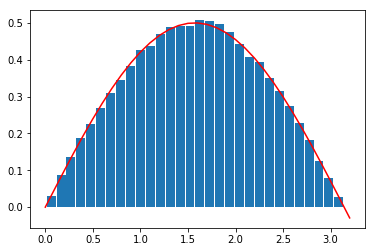

In [3]:
import numpy as np
from scipy.stats import uniform
import matplotlib.pyplot as plt

n = 100_000
eta = uniform(0, 1)

@np.vectorize
def quart(x):
    return np.arccos(1 - 2*x)

x = np.arange(0, np.pi + 0.1, 0.1)

pdf = 0.5*np.sin(x)

data = quart(eta.rvs(size=n))
plt.hist(data, density=True, rwidth=0.9, bins=30)
plt.plot(x, pdf, 'r')
plt.show()

### 1.2 Нормальний розподіл

Нехай випадкова величина $\xi \sim N(0, 1)$.

Згенеруйте $n = 100000$ значень випадкової величини $\xi$ за допомогою квантильного перетворення.

Намалюйте нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\xi$ разом з її функцією щільності.

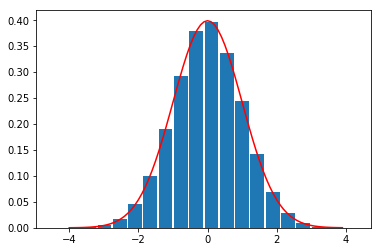

In [7]:
from scipy.stats import norm

x = np.arange(-4, 4, 0.1)
unif = uniform(0, 1).rvs(size=n)
data = norm(0, 1).ppf(unif)
plt.hist(data, density=True, rwidth=0.9, bins=20)
plt.plot(x, norm(0, 1).pdf(x), 'r')
plt.show()



## 2 Відсутність пам'яті

Розглянемо випадкову величину $\xi$ з геометричного розподілу з параметром $p = 0.5$.
Тобто $\xi \sim Geom(0.5)$.

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію ймовірностей випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = (\xi - 1) I_{(\xi - 1) > 0}$;
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих значень випадкової величини $\eta$;
   - функцію ймовірностей випадкової величини $\xi$.

**Зауваження 1.** Графік функції ймовірнстей краще малювати для $10$ значень.

**Зауваження 2.** У гістограмах проміжок значень слід розбивати на одиничні інтервали.

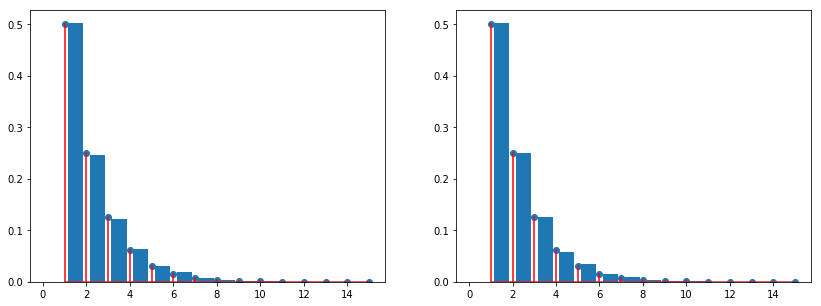

In [8]:
from scipy.stats import geom


def get_eta(xi, n):
    xi_rvs = xi.rvs(size=n)
    indicator = np.array([int(cur_xi - 1 > 0) for cur_xi in xi_rvs])
    return (xi_rvs * indicator) - 1


fig = plt.gcf()
fig.set_size_inches(14, 5)

xi = geom(0.5)
n = 10_000

plt.subplot(121)
x = np.arange(1, 16)
data = xi.rvs(size=n)
plt.hist(data, density=True, rwidth=0.7, bins=range(16))
plt.stem(x, xi.pmf(x), 'r')

plt.subplot(122)
eta_rvs = get_eta(xi, n)
plt.hist(eta_rvs, density=True, rwidth=0.7, bins=range(16))
plt.stem(x, xi.pmf(x), 'r')

plt.show()

## 3 Задача 1.11.3

Розглянемо випадкову величину $\xi$ зі стандартного експоненційного розподілу.
Тобто $\xi \sim Exp(1)$.

### 3.1 Експонента

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = \exp\{-\xi\}$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $\eta$.

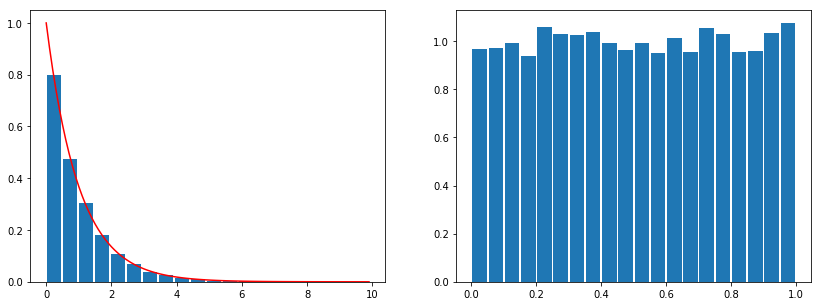

In [10]:
from scipy.stats import expon

xi = expon(0, 1)
fig = plt.gcf()
fig.set_size_inches(14, 5)

plt.subplot(121)

x = np.arange(0, 10, 0.1)
xi_rvs = xi.rvs(size=n)
plt.hist(xi_rvs, density=True, rwidth=0.9, bins=20)
plt.plot(x, xi.pdf(x), 'r')

plt.subplot(122)
eta_rvs = np.exp(-xi_rvs)
plt.hist(eta_rvs, density=True, rwidth=0.9, bins=20)

plt.show()




### 3.2 Квадрат

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = \xi^2$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $\eta$.

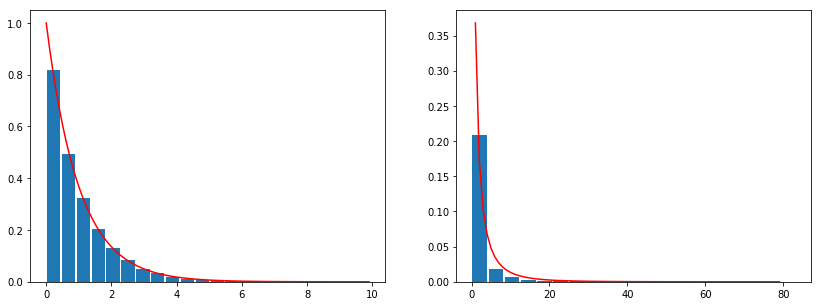

In [13]:
fig = plt.gcf()
fig.set_size_inches(14, 5)

plt.subplot(121)

x = np.arange(0, 10, 0.1)
xi_rvs = xi.rvs(size=n)
plt.hist(xi_rvs, density=True, rwidth=0.9, bins=20)
plt.plot(x, xi.pdf(x), 'r')

y = np.arange(1, 80)
plt.subplot(122)
eta_rvs = xi_rvs**2
plt.hist(eta_rvs, density=True, rwidth=0.9, bins=20)
plt.plot(y, np.exp(-(y)**0.5)*(y)**(-0.5), 'r')
# plt.plot(x, xi.pdf(x), 'g')

plt.show()



## 4 Задача 1.11.5

Розглянемо випадкову величину $\xi$ зі стандартного рівномірного розподілу.
Тобто $\xi \sim Unif(0, 1)$.

### 4.1 Лінійне перетворення

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = 3 \xi - 2$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $\eta$.

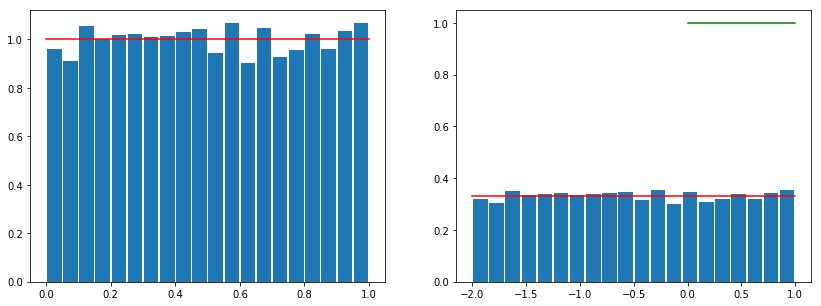

In [8]:
fig = plt.gcf()
fig.set_size_inches(14, 5)

plt.subplot(121)

x = np.arange(0, 1.1, 0.1)
xi = uniform(0, 1)
xi_rvs = xi.rvs(size=n)
plt.hist(xi_rvs, density=True, rwidth=0.9, bins=20)
plt.plot(x, xi.pdf(x), 'r')

y = np.arange(-2, 1.1, 0.1)
y_pdf = [1/3 for i in range(len(y))]
plt.subplot(122)
eta_rvs = 3*xi_rvs - 2
plt.hist(eta_rvs, density=True, rwidth=0.9, bins=20)
plt.plot(y, y_pdf,'r')
plt.plot(x, xi.pdf(x), 'g')

plt.show()

### 4.2 Модуль від лінійного перетворення

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = |2 \xi - 1|$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $\eta$.

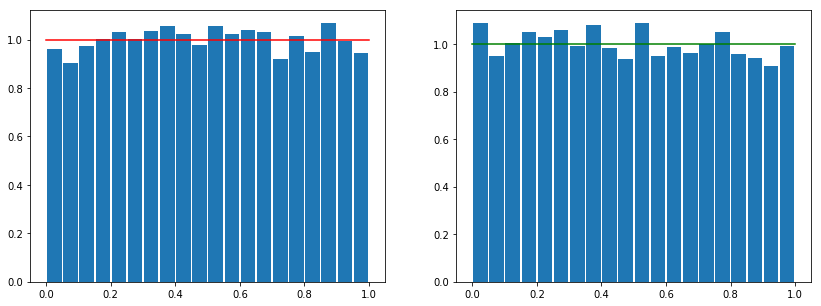

In [54]:
fig = plt.gcf()
fig.set_size_inches(14, 5)

plt.subplot(121)

x = np.arange(0, 1.1, 0.1)
xi = uniform(0, 1)
xi_rvs = xi.rvs(size=n)
plt.hist(xi_rvs, density=True, rwidth=0.9, bins=20)
plt.plot(x, xi.pdf(x), 'r')

y = np.arange(0, 1.1, 0.1)
y_pdf = [1 for i in range(len(y))]
plt.subplot(122)
eta_rvs = abs(2*xi_rvs - 1)
plt.hist(eta_rvs, density=True, rwidth=0.9, bins=20)
plt.plot(y, y_pdf,'g')

plt.show()

### 4.3 Логарифм

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = - \log \xi$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $\eta$.

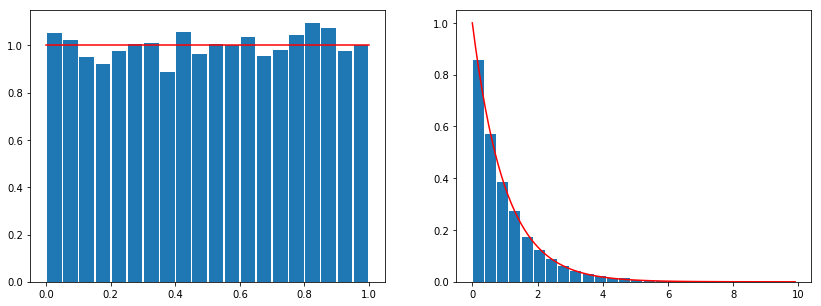

In [17]:
fig = plt.gcf()
fig.set_size_inches(14, 5)

plt.subplot(121)
x = np.arange(0, 1.1, 0.1)
xi = uniform(0, 1)
xi_rvs = xi.rvs(size=n)
plt.hist(xi_rvs, density=True, rwidth=0.9, bins=20)
plt.plot(x, xi.pdf(x), 'r')

y = np.arange(0, 10, 0.1)
plt.subplot(122)
eta_rvs = -np.log(xi_rvs)
plt.hist(eta_rvs, density=True, rwidth=0.9, bins=20)
plt.plot(y, np.exp(-y), 'r')
plt.show()




## 5 Одиничний квадрат

Реалізуйте вадкову величину рівномірно розподілену на одиничному квадраті.
Тобто $\xi = (x, y), \quad x, y \sim Unif(0, 1)$.

In [31]:
def get_xi(size=1):
    x = uniform(0, 1)
    return tuple(zip(x.rvs(size=size), x.rvs(size=size)))

Знайдіть функцію щільності випадкової величини $\xi_1 = x^2 + y^2$.
Намалюйте її разом із нормованою гістограмою $n = 100000$ значень випадкової величини $\xi_1$,
отриманою перетвореннями випадкових величин $x, y$.

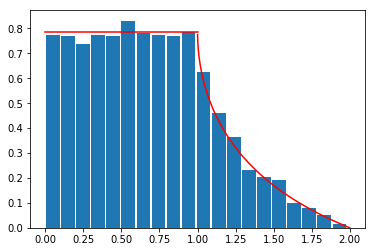

In [48]:
xi = get_xi(size=n)
xi1 = [xi[i][0]**2 + xi[i][1]**2 for i in range(len(xi))]

t = np.arange(1.0001, 2, 0.001)
ft = np.pi/4 - np.arccos(t**(-0.5)) -0.5*(t-1)**(-0.5) + 0.5*(t-1)**(-0.5)

t2 = np.arange(0, 1.5, 0.5)
ft2 = [np.pi/4 for i in range(len(t2))]

plt.hist(xi1, density=True, rwidth=0.9, bins=20)
plt.plot(t, ft, 'r', t2, ft2, 'r')
plt.show()

Знайдіть функцію щільності випадкової величини $\xi_2 = \max (x, y)$.
Намалюйте її разом із нормованою гістограмою $n = 100000$ значень випадкової величини $\xi_2$,
отриманою перетвореннями випадкових величин $x, y$.

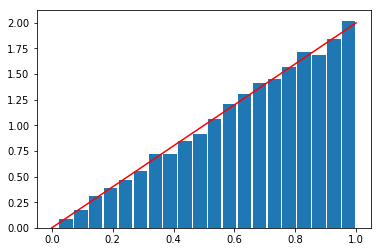

In [49]:
xi2 = [max(xi[i][0], xi[i][1]) for i in range(len(xi))]
plt.hist(xi2, density=True, rwidth=0.9, bins=20)
t = np.arange(0, 1.1, 0.1)
ft = 2*t
plt.plot(t, ft, 'r')
plt.show()

Знайдіть функцію щільності випадкової величини $\xi_3 = |x - y|$.
Намалюйте її разом із нормованою гістограмою $n = 100000$ значень випадкової величини $\xi_3$,
отриманою перетвореннями випадкових величин $x, y$.

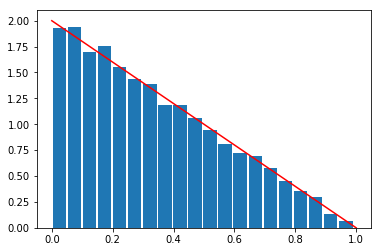

In [50]:
xi3 = [abs(xi[i][0] - xi[i][1]) for i in range(len(xi))]
plt.hist(xi3, density=True, rwidth=0.9, bins=20)
t = np.arange(0, 1.1, 0.1)
ft = -2*t + 2
plt.plot(t, ft, 'r')
plt.show()